<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Dynamical-Systems" data-toc-modified-id="Introduction-to-Dynamical-Systems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Dynamical Systems</a></span><ul class="toc-item"><li><span><a href="#1D-System:-Logistic-Function" data-toc-modified-id="1D-System:-Logistic-Function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1D System: Logistic Function</a></span></li></ul></li><li><span><a href="#Moving-to-Higher-Dimensions" data-toc-modified-id="Moving-to-Higher-Dimensions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Moving to Higher Dimensions</a></span><ul class="toc-item"><li><span><a href="#Example:-2D-System-Newton's-Method" data-toc-modified-id="Example:-2D-System-Newton's-Method-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example: 2D System Newton's Method</a></span></li><li><span><a href="#Scalabilitty-Challenge-in-Higher-Dimensions" data-toc-modified-id="Scalabilitty-Challenge-in-Higher-Dimensions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Scalabilitty Challenge in Higher Dimensions</a></span></li><li><span><a href="#Isolating-Neighborhoods" data-toc-modified-id="Isolating-Neighborhoods-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Isolating Neighborhoods</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib notebook
import cmath
import time

In [2]:
from scipy.linalg import leslie

# Introduction to Dynamical Systems

A dynamical system is a recursive function that takes in an initial condition $\begin{equation}x_{0}\end{equation}$ and computes \begin{equation} x_{n+1}=F(x_{n}) \end{equation} for some map F. The set $\{x_i|i=1...N\}$ is known as the trajectory of the dynamical system. We can study the flow to understand properties of this dynamical system. Here $N$ are the number of steps. Below we define a function that will take in a map $F$ , the number of steps $N$, and an initial condition in the form of a list to compute the flow of the dynamical system.

In [3]:
def create_dynamics(fmap,x,steps=30,**kwargs):
    for i in range(steps):
        x_temp = fmap(x[-1],kwargs)
        x.append(x_temp)
    x=np.asarray(x)
    return x

## 1D System: Logistic Function

We will define the logistic function with parameter $a$ as
\begin{equation} F(x)=ax(1-x) \end{equation}
and examine what happens to this system for different values of $a$. Note that $a$ is known as the parameter of the dynamical system.

In [4]:
def logistic(x,kwargs):
    a=kwargs['a']
    return a*x*(1-x)

The point of intersection between the line and the curve is known as a fixed points. There, \begin{equation} F(x)=x \end{equation} and no matter how many more times I apply the function, it will always remain at this point. This is known as an attractor.

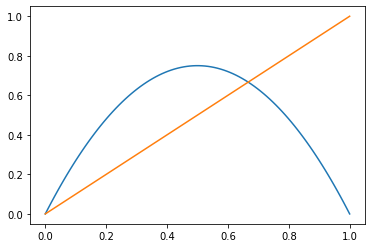

In [5]:
x=np.linspace(0,1,100)
plt.plot(x,logistic(x,{'a':3}))
plt.plot(x,x)
plt.show()

In [6]:
aes1 = np.linspace(1,3,50)
aes2 = np.linspace(3,4,400)
aes = np.concatenate((aes1,aes2))

traj_dict = {}
bifurcation_plot = []
for a in aes:
    x0=[np.random.rand()]
    y = create_dynamics(logistic,x=x0,steps=500,a=a)
    traj_dict[a]=y
    bifurcation_plot.append([a,y[-1]])
df_bifurcation = pd.DataFrame(bifurcation_plot,columns=['a','y'])

Let's walk through some of the dynamics of this system by changing a and seeing the impact it has. I will choose a few points for a: 1.5, 3.25, 3.6, and 3.8.

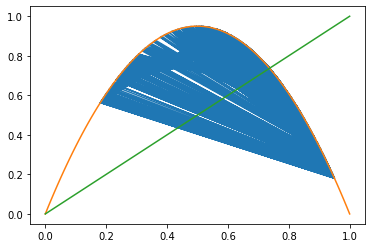

In [7]:
def closest(lst, K):    
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))] 
a=closest(list(traj_dict.keys()),3.8)
xp,yp = (traj_dict[a][:-1],traj_dict[a][1:])
plt.plot(xp,yp)
x=np.linspace(0,1,100)
plt.plot(x,logistic(x,{'a':a}))
plt.plot(x,x)
plt.show()

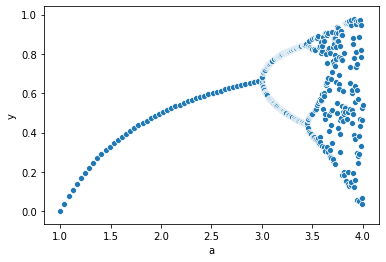

In [8]:
sns.scatterplot(x='a',y='y',data=df_bifurcation)

# Moving to Higher Dimensions

## Example: 2D System Newton's Method
Newton's method is given by:
\begin{equation}
x_{n+1} = x_n - f(x_n)/f'(x_n)
\end{equation}

Let's let $f(x) = z^3-1$ where $z$ $\epsilon$ ${C}^2$ and apply Newton's method

In [9]:
def newton(x,kwargs):
    f = kwargs['f']
    fp = kwargs['fp']
    fxn = f(x)
    fpxn = fp(x)
    return x-fxn/(fpxn+.00001)

def parab(x):
    return x**3-1
def parabp(x):
    return 3*x**2

## Scalabilitty Challenge in Higher Dimensions
Moving to higher dimensions becomes more difficult as we need to abstract our 1D use case to collectively be applied to multiple dimensions. This poses some serious scalability issues. To address these challenges, we will review the following.  
1. Isolating neighborhoods
2. Outer Approximations
3. Morse Graphs
4. Homology Groups
5. Conley Indices

## Isolating Neighborhoods

The items of interest in dynamical systems are invariant sets. These are sets that when entered, cannot be left. So, for example:

1. Attractor/Fixed point: Like we saw in the previous example, once you are in, you can't leave.
2. A periodic orbit
3. A chaotic set.

These sets can be very complicated. Ex. if you have chaos, you can have a chaotic invariant set but you will never be able to compute it exactly. $\textbf{Conley index theory}$ provides an avenue to study these invariannt sets in that it claims that you don’t need to find invariant set but you instead need to ID the isolating neighborhoods. These neighborhoods are compact sets that are self contained. Namely,
\begin{equation}
S \epsilon D, F(S)\epsilon D  
\end{equation}

In [10]:
def plot_complex(complex_list):
    x=[root.real for root in roots]
    y=[root.imag for root in roots]
    return x,y

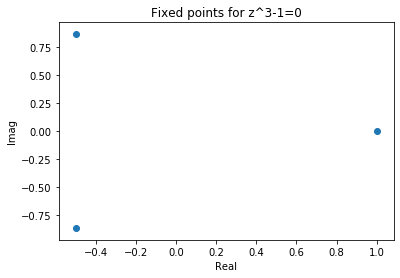

In [11]:
#Roots for example
roots = [cmath.rect(1,0),cmath.rect(1,np.pi-np.pi/3),cmath.rect(1,np.pi+np.pi/3)]
x,y = plot_complex(roots)
plt.scatter(x,y)
plt.title('Fixed points for z^3-1=0')
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

In this particular case, we know exactly where the invariant sets are. So, any grid that covers one or more of these roots is considered an isolating neighborhood for the root. A collection of isolating neighborhoods, is also an isolating neighborhood. We should note that no invariant sets should fall on a border of a neighborhood but be completely self contained. 

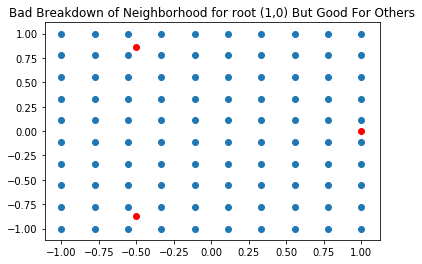

In [13]:
from itertools import product
complex_grid = np.linspace(-1,1,10)
complex_grid = list(product(complex_grid,complex_grid))
x,y=zip(*complex_grid)
plt.scatter(x,y)
xr,yr = plot_complex(roots)
plt.scatter(xr,yr,color='r')
plt.title("Bad Breakdown of Neighborhood for root (1,0) But Good For Others")
plt.show()

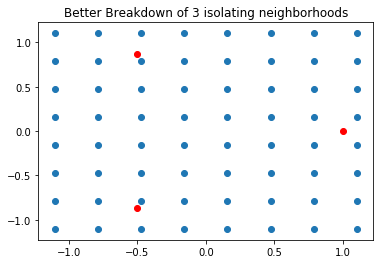

In [14]:
complex_grid = np.linspace(-1.1,1.1,8)
complex_grid = list(product(complex_grid,complex_grid))
x,y=zip(*complex_grid)
plt.scatter(x,y)
xr,yr = plot_complex(roots)
plt.scatter(xr,yr,color='r')
plt.title("Better Breakdown of 3 isolating neighborhoods")
plt.show()

In [15]:
fine_complex_grid = np.linspace(-1.1,1.1,100)
fine_complex_grid = list(product(fine_complex_grid,fine_complex_grid))
zs = [complex(a,b) for a,b in fine_complex_grid]

In [18]:
images = []
for z0 in zs:
    complex_traj = create_dynamics(fmap=newton,steps=100,x=[z0],f=parab,fp=parabp)
    image = complex_traj[-1]
    images.append([z0,image,z0.real,z0.imag,image.real,image.imag])

df_image = pd.DataFrame(images,columns=['z0','image','z0_real','z0_imag','image_real','image_imag'])


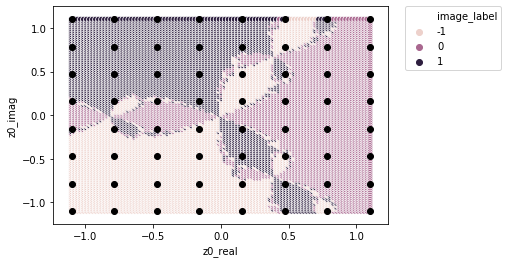

In [19]:
def fix_label(val):
    if cmath.phase(val)<0:
        return -1
    elif cmath.phase(val)>0:
        return 1
    else:
        return 0
df_image['image_label']=df_image['image'].apply(fix_label)
sns.scatterplot(x='z0_real',y='z0_imag',data=df_image,hue='image_label')
plt.scatter(x,y,color='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)